# Assignment 3: Building Models with Stan

In [1]:
import numpy as np
import scipy as sp
import scipy.stats as sts
import matplotlib.pyplot as plt

import pystan

### Task 1.1: Call Center

In [2]:
# Load the data set containing durations between calls arriving at the call
# center during 1 day. All values are in minutes.
waiting_times_day = np.loadtxt('call_center.csv')

# Display some basic information about the data set.
print('Size of data set:', len(waiting_times_day))
print('First 3 values in data set:', waiting_times_day[:3])
print('Sum of data set:', sum(waiting_times_day))

# Make 24 empty lists, one per hour.
waiting_times_per_hour = [[] for _ in range(24)]

# Split the data into 24 separate series, one for each hour of the day.
current_time = 0
for t in waiting_times_day:
    current_hour = int(current_time // 60)
    current_time += t
    waiting_times_per_hour[current_hour].append(t)

Size of data set: 5856
First 3 values in data set: [30.   3.4  3.2]
Sum of data set: 1441.6838153800093


In [92]:
call_center_stan_code = """

// The data block contains all known quantities - typically the observed
// data and any constant hyperparameters.
data {  
    int<lower=1> num_intervals;  // number of call intervals
    real<lower=0> waiting_time[num_intervals];  // waiting time per interval
    real<lower=0> alpha;  // fixed prior hyperparameter
    real<lower=0> beta;   // fixed prior hyperparameter
}

// The parameters block contains all unknown quantities - typically the
// parameters of the model. Stan will generate samples from the posterior
// distributions over all parameters.
parameters {
    real<lower=0> lambda;  // call rate
}

// The model block contains all probability distributions in the model.
// This of this as specifying the generative model for the scenario.
model {
    lambda ~ gamma(alpha, beta);  // prior over lambdas
    for(i in 1:num_intervals) {
        waiting_time[i] ~ exponential(lambda);  // likelihood function
    }
}

"""

In [93]:
hour_index = 13

call_center_data = {
    "num_intervals": len(waiting_times_per_hour[hour_index]),
    "waiting_time": waiting_times_per_hour[hour_index],
    "alpha": 1,
    "beta": 0.25,
}

In [94]:
stan_model_call_center = pystan.StanModel(model_code=call_center_stan_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_5ecbf1e6c285fa2e1535028ff15f5208 NOW.


In [95]:
results_call_center = stan_model_call_center.sampling(data=call_center_data)

In [109]:
lambda_samples_call_center = results_call_center.extract()['lambda']
conf_int_call_center = np.quantile(lambda_samples_call_center, [0.01, 0.99])
print("98% confidence interval is: [{}, {}]".format(conf_int_call_center[0], conf_int_call_center[1]))

98% confidence interval is: [5.639676852859057, 7.145063523011561]


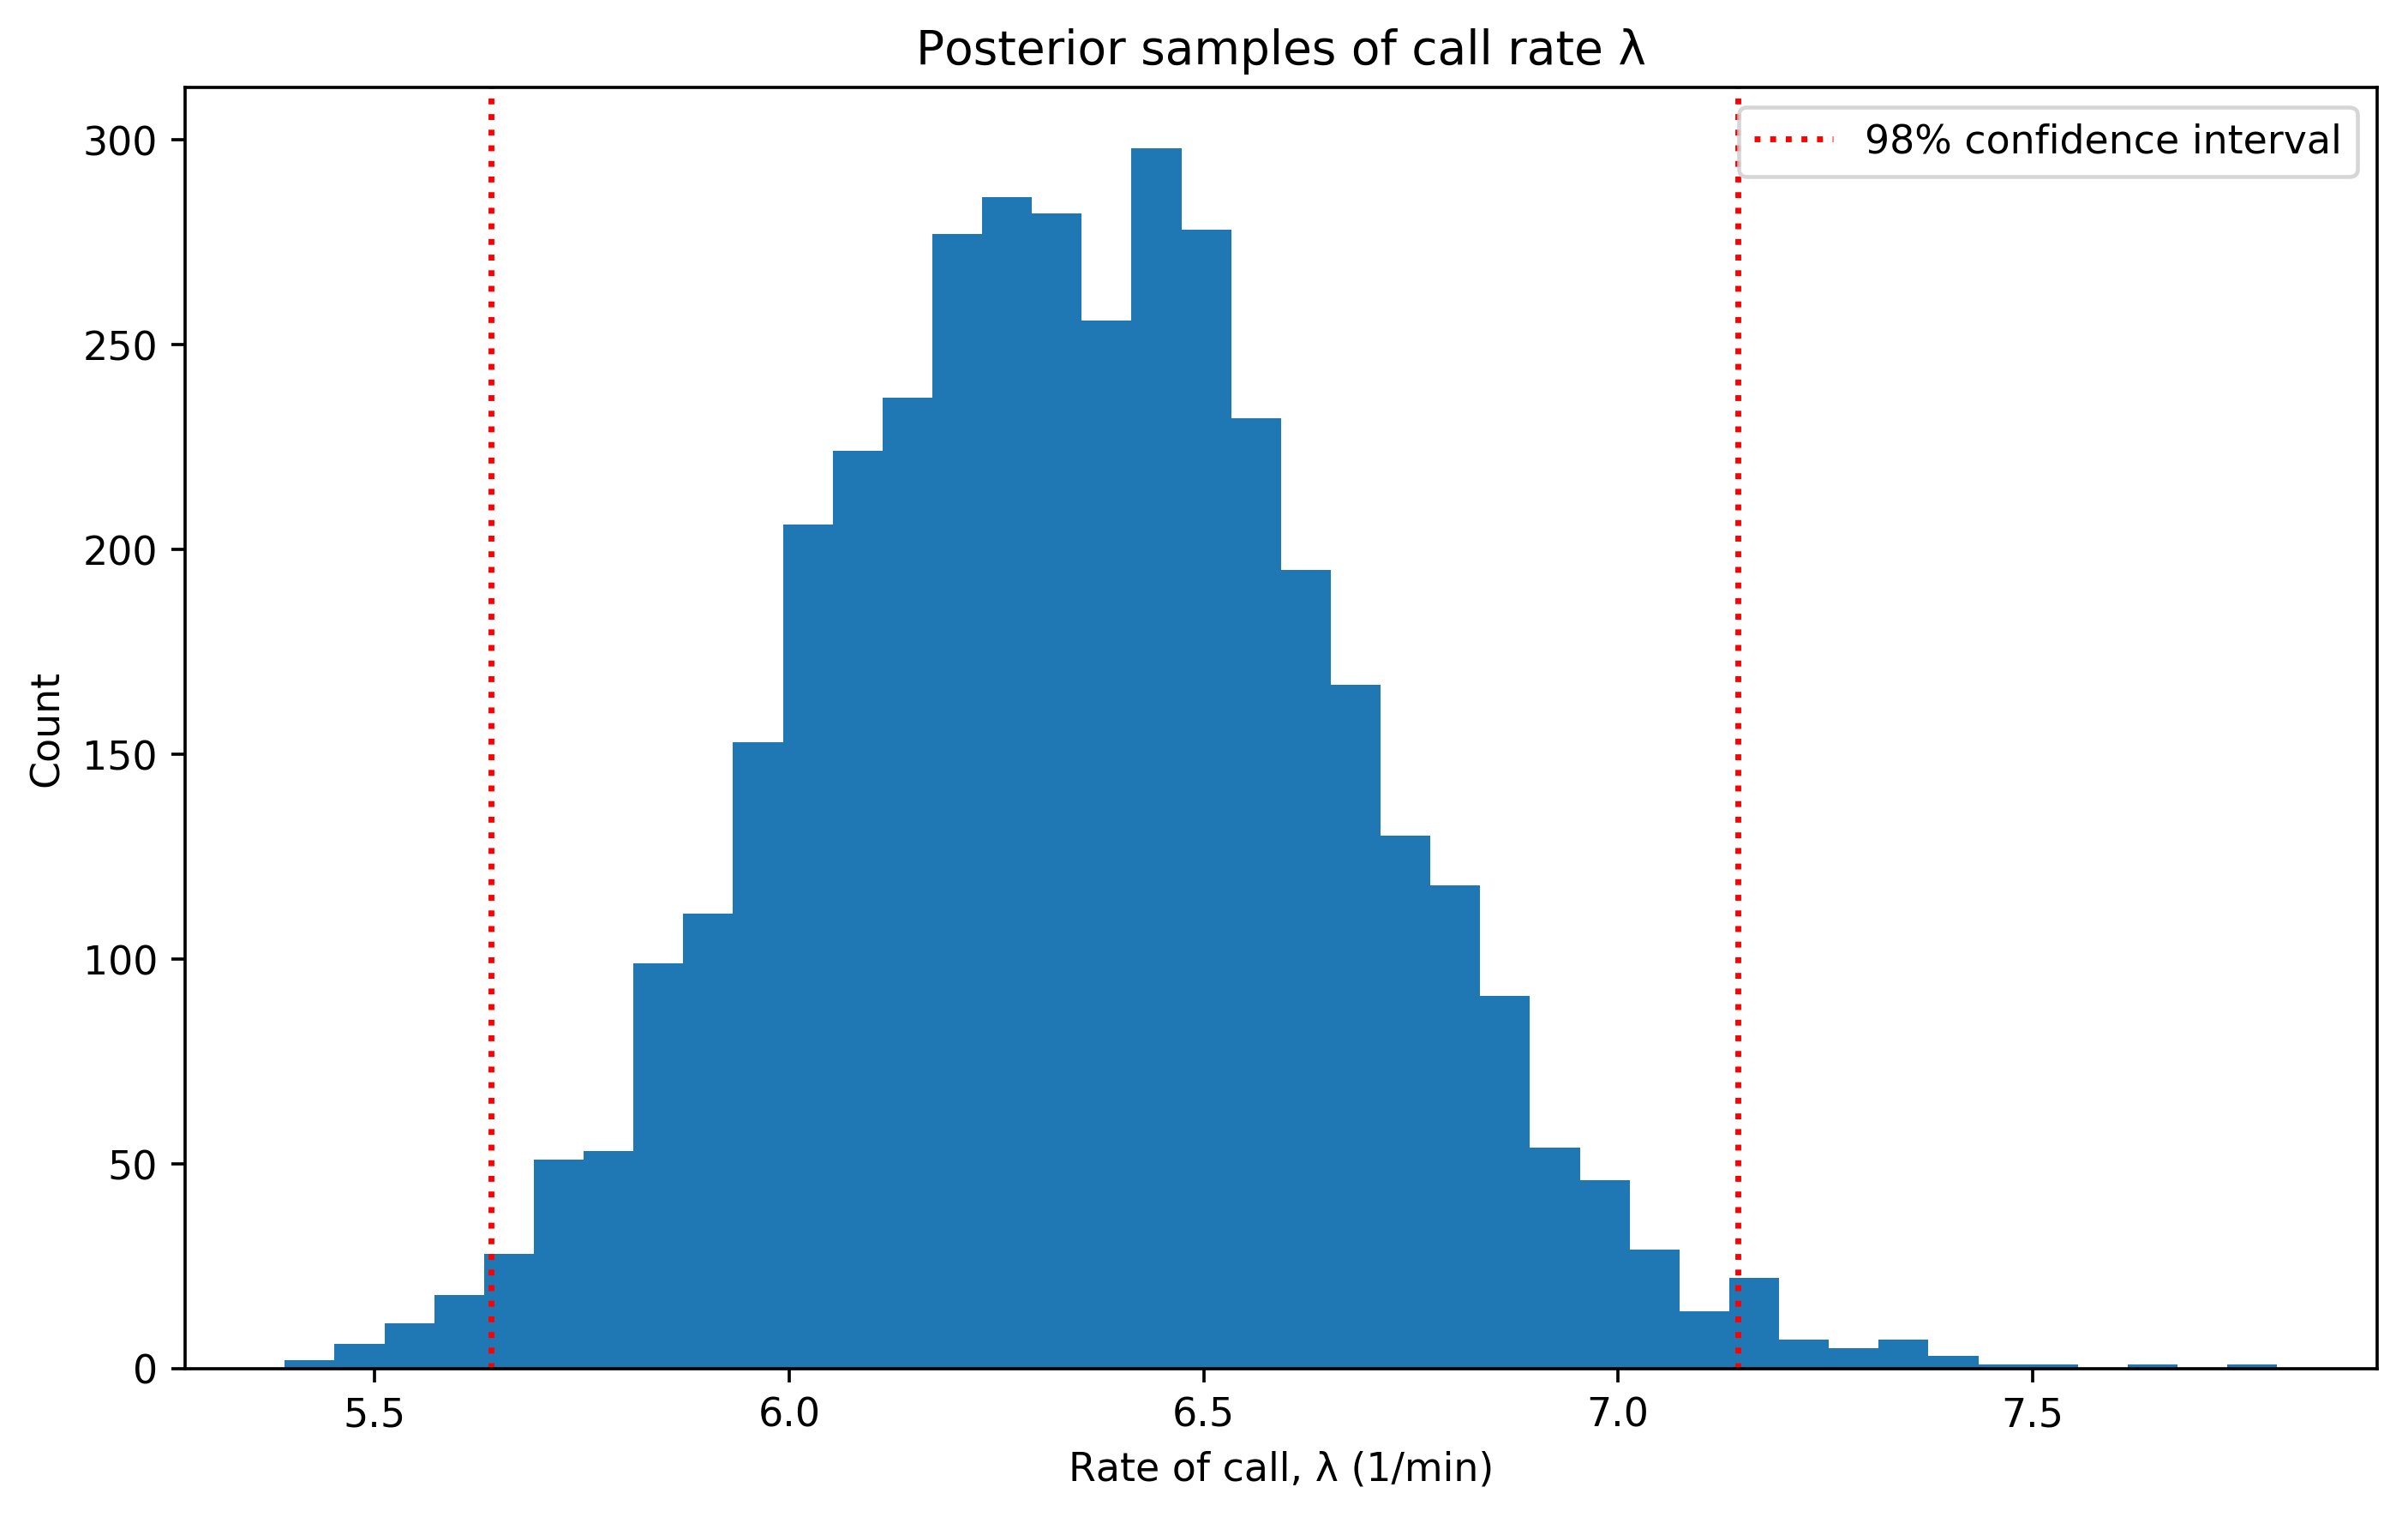

In [227]:
plt.figure(figsize=(10, 6), dpi=330)
plt.hist(lambda_samples_call_center, bins=40)
plt.ylabel('Count')
plt.xlabel('Rate of call, λ (1/min)')
plt.title('Posterior samples of call rate λ')
plt.axvline(conf_int_call_center[0], color="red", linestyle=':', label='98% confidence interval')
plt.axvline(conf_int_call_center[1], color="red", linestyle=':')
plt.legend()
plt.show()

### Task 1.2: Normal Likelihood with Normal-Inverse-Gamma Prior

In [197]:
data = np.array([3.54551763569501, 4.23799861761927, 4.72138425951628, -0.692265320368236, 3.04473513808788, 3.10721270732507, 3.42982225852764, 3.12153903971176, 3.60532628639808, 2.46561737557325, 1.64059465916131, 2.4621623937158, 2.76744495617481, 2.11580054750407, 5.14077208608354, 4.90288499104252, 1.43357579078348, 4.78997817363558, 1.93633438207439, 2.43698838097178, 3.95389148701877, 2.4242295507716, 2.90256268679023, 2.90931728045901, 0.658072819386888, 3.05946763895983, 3.42615331539605, 2.68842833004417, 2.35850130765166, 2.20014998540933, 4.73846511350084, 4.19839721414451, 2.11805510171691, -0.572742936038015, 0.389413982010623, 3.87846130744249, 1.34057656890858, 0.7235748351719, 5.11042369840174, 4.00747556696571, 3.18080956726965, 3.24677964069676, 5.1154659863626, 1.80276616697155, 0.305877679021404, -0.449168307882718, 4.63705561194774, 1.37783714058301, 4.9608149859515, 6.7764195802069, 1.75515522922399, 7.04457337435215, 0.625185284955128, 2.25130734369064, 2.19770178119255, 2.16858257249432, 6.25367644481438, 0.116081323476489, 2.06315857864341, 1.82409781471718, 5.15226741230987, 2.03408231293173, -1.12450854337596, 5.03511270642234, 2.03841989653263, 5.80911741751597, 2.31718128783245, 4.97575010580997, 3.34262752222776, -0.786983904253601, 0.777362359850013, 0.975825009321195, 3.76354577515958, 7.27215002907876, 1.35404089480189, 3.76567940257157, 3.48573993343334, 1.85976988586156, 1.93567061960716, 5.31071812003942, 2.96832987672751, 3.32378908637275, 2.61631960054551, 5.80897964052825, 4.95215217171488, 1.32036772796131, 3.79932542233371, 3.08108492766309, 2.6734110081666, -0.14251851138521, 2.48744375588965, 3.98463042123415, 6.32781680028, 4.0029172024315, 4.23210369459457, 1.71412938967325, 5.16492114963802, 2.53409673107906, 4.77346963973334, 3.34088878725551, 4.77681472750664, 3.81135755590976, 1.14054269983137, 1.42057452397702, 0.132142311125433, 7.12577254064672, 4.85422012781764, 4.15745720676399, 4.48763147363348, 1.56060322283629, 2.64821761542887, 1.26655351354548, 4.48497722937931, 4.3286302403783, 4.26157679512625, 4.0597558651364, 5.14051109132496, 2.5660348362221, 1.10764013818617, 0.386889523012303, 3.54150473246237, 3.57480214382351, 1.95150869584847, 2.70688970563118, 2.47971849820016, 6.50838037000679, 4.01511556826974, 1.11562740835344, 5.02637639472439, 4.38184491686864, 5.60423144047386, 2.40067408379298, 5.7849941378344, 2.37225791084559, 6.86031465910273, 4.09214858239736, 6.85994063692621, 3.62202415158781, -1.11220646958158, 3.73920971696866, 3.24533871512216, 1.28724203643002, 0.291152541773164, 0.368630935755111, 6.71607270510525, 5.42278455200833, 5.35188416119281, 2.305874586163, -1.85878097203032, 2.69877382351447, 4.84121860550417, 4.40973060799391, 5.04399320650774, 2.68632252661298, 6.06531610659912, 3.11881325011993, 3.45532087005125, 3.08442259840346, 4.43564424136733, 2.84252623135804, 1.50536798885106, 1.48868622407603, 2.07322837615663, 2.5476910210998, 5.66941808257884, 2.16731067416426, 2.49843958833905, 3.94586413879977, 0.316433764679541, -0.608937441815983, 2.5943436558557, 1.05516869528337, 2.1447601332725, 6.65846634141906, 2.1771555267834, 5.23953812029442, 3.53629759842647, 6.03263538017003, 3.85739159396599, 5.95093453004638, 1.12856987160476, 3.5559912886093, 2.21974864244489, 3.38471394882135, -1.90805399279409, 3.5113699258973, 4.49319955412346, 5.10507952638867, 1.08277895384184, 4.58403638422759, 1.37304994426824, 4.17566975753523, 3.36454182510378, 0.177136582644021, 2.91337423388405, 3.22796455457526, 2.80124198378441, 1.95189718582788, 3.37659263896246, -1.6463045238231])
print(len(data), "data")

200 data


In [211]:
normal_likelihood_stan_code = """

// The data block contains all known quantities - typically the observed
// data and any constant hyperparameters.
data {  
    int<lower=1> data_len;
    real<lower=-1000> normal_likelihood_data[data_len];
    real<lower=0> mu;
    real<lower=0> nu;
    real<lower=0> alpha;
    real<lower=0> beta;
}

// The parameters block contains all unknown quantities - typically the
// parameters of the model. Stan will generate samples from the posterior
// distributions over all parameters.
parameters {
    real<lower=-1000> x;
    real<lower=0> sigma2;
}

// The model block contains all probability distributions in the model.
// This of this as specifying the generative model for the scenario.
model {
    sigma2 ~ inv_gamma(alpha, beta);
    x ~ normal(mu, sqrt(sigma2 / nu));
    for (i in 1:data_len)
        normal_likelihood_data[i] ~ normal(x, sqrt(sigma2));
}

"""

In [212]:
stan_model_normal_likelihood = pystan.StanModel(model_code=normal_likelihood_stan_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_ff6032204bc21e80061c0fadd9bbf570 NOW.


In [213]:
normal_likelihood_data = {
    "data_len": len(data),
    "normal_likelihood_data": data,
    "mu": 0,
    "nu": 0.054,
    "alpha": 1.12,
    "beta": 0.4
}

In [214]:
normal_likelihood_results = stan_model_normal_likelihood.sampling(data=normal_likelihood_data)
print(normal_likelihood_results.stansummary(pars=['x', 'sigma2'], probs=[0.025, 0.975]))

Inference for Stan model: anon_model_ff6032204bc21e80061c0fadd9bbf570.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

         mean se_mean     sd   2.5%  97.5%  n_eff   Rhat
x        3.06  2.3e-3   0.13    2.8   3.33   3463    1.0
sigma2   3.61    0.02   0.35   2.98   4.34    549    1.0

Samples were drawn using NUTS at Sat Oct 19 15:35:06 2019.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


In [215]:
raw_normal_likelihood_results = normal_likelihood_results.extract()

num_samples = 10
rand_idx = np.random.choice(range(4000), num_samples) # number of draws
x_samples = raw_normal_likelihood_results['x'][rand_idx]
sigma2_samples = raw_normal_likelihood_results['sigma2'][rand_idx]

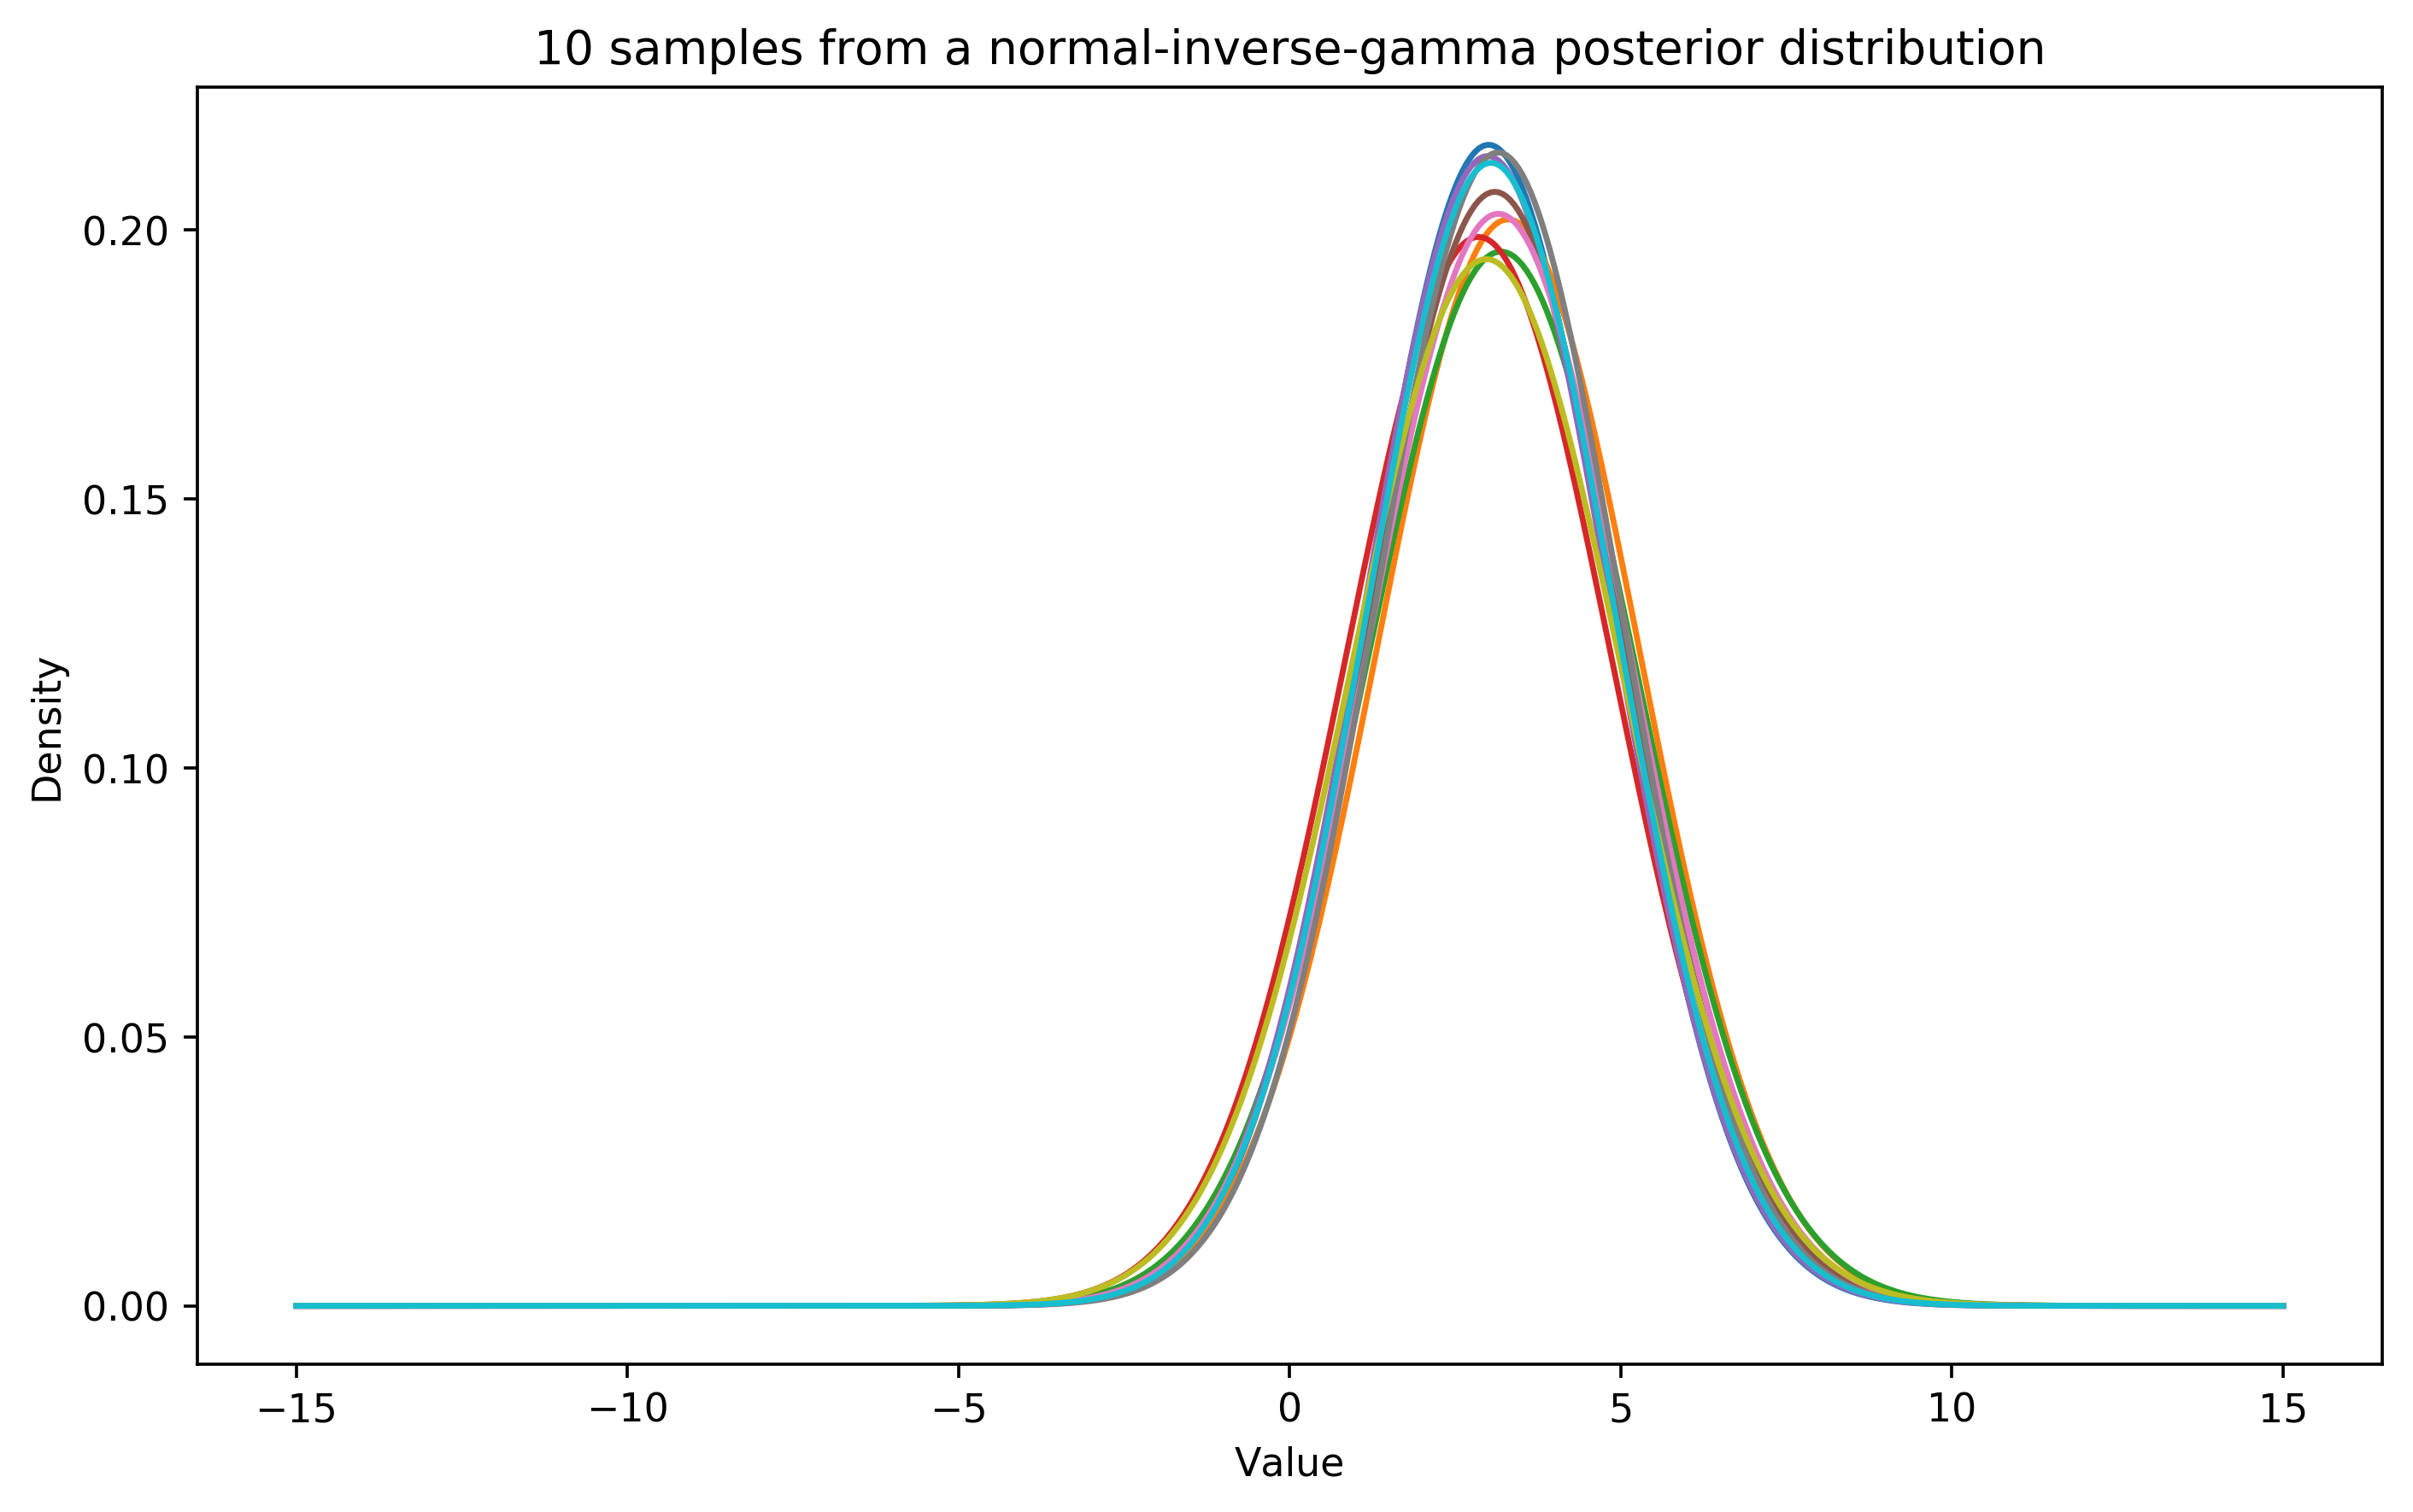

In [218]:
plt.figure(figsize=(10, 6), dpi=330)
plot_x = np.linspace(-15, 15, 500)

for i in range(num_samples):
    plot_y = sts.norm.pdf(plot_x, loc=x_samples[i], scale=np.sqrt(sigma2_samples[i]))
    plt.plot(plot_x, plot_y)
    
plt.ylabel('Density')
plt.xlabel('Value')
plt.title('%i samples from a normal-inverse-gamma posterior distribution' % num_samples)
plt.show()

### Task 1.3: Log-normal HRTEM data

In [122]:
# Load data: read the particle sizes (in nanometers) from a CSV file.
data = np.loadtxt('hrtem.csv')
log_data = np.log(data)
print('%i data, min: %f, max: %f' % (len(log_data), min(log_data), max(log_data)))

500 data, min: 0.050529, max: 3.365314


In [221]:
hrtem_stan_code = """

// The data block contains all known quantities - typically the observed
// data and any constant hyperparameters.
data {  
    int<lower=1> data_len;
    real<lower=0> hrtem_data[data_len];
    real<lower=0> mu;
    real<lower=0> nu;
    real<lower=0> alpha;
    real<lower=0> beta;
}

// The parameters block contains all unknown quantities - typically the
// parameters of the model. Stan will generate samples from the posterior
// distributions over all parameters.
parameters {
    real<lower=0> x;
    real<lower=0> sigma2;
}

// The model block contains all probability distributions in the model.
// This of this as specifying the generative model for the scenario.
model {
    sigma2 ~ inv_gamma(alpha, beta);
    x ~ normal(mu, sqrt(sigma2 / nu));
    for (i in 1:data_len)
        hrtem_data[i] ~ normal(x, sqrt(sigma2));
}

"""

In [222]:
stan_model_hrtem = pystan.StanModel(model_code=hrtem_stan_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_113a1aa8e14a85988c8e9b622908aa26 NOW.


In [223]:
hrtem_data = {
    "data_len": len(log_data),
    "hrtem_data": log_data,
    "mu": 2.3,
    "nu": 0.1,
    "alpha": 2,
    "beta": 5
}

In [224]:
hrtem_results = stan_model_hrtem.sampling(data=hrtem_data)
print(hrtem_results.stansummary(pars=['x', 'sigma2'], probs=[0.025, 0.975]))

Inference for Stan model: anon_model_113a1aa8e14a85988c8e9b622908aa26.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

         mean se_mean     sd   2.5%  97.5%  n_eff   Rhat
x        1.89  5.3e-4   0.03   1.83   1.95   3383    1.0
sigma2    0.5  5.4e-4   0.03   0.44   0.56   3405    1.0

Samples were drawn using NUTS at Sat Oct 19 15:57:48 2019.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


In [225]:
raw_hrtem_results = hrtem_results.extract()

num_samples = 10
rand_idx = np.random.choice(range(4000), num_samples) # number of draws
x_samples_hrtem = raw_hrtem_results['x'][rand_idx]
sigma2_samples_hrtem = raw_hrtem_results['sigma2'][rand_idx]

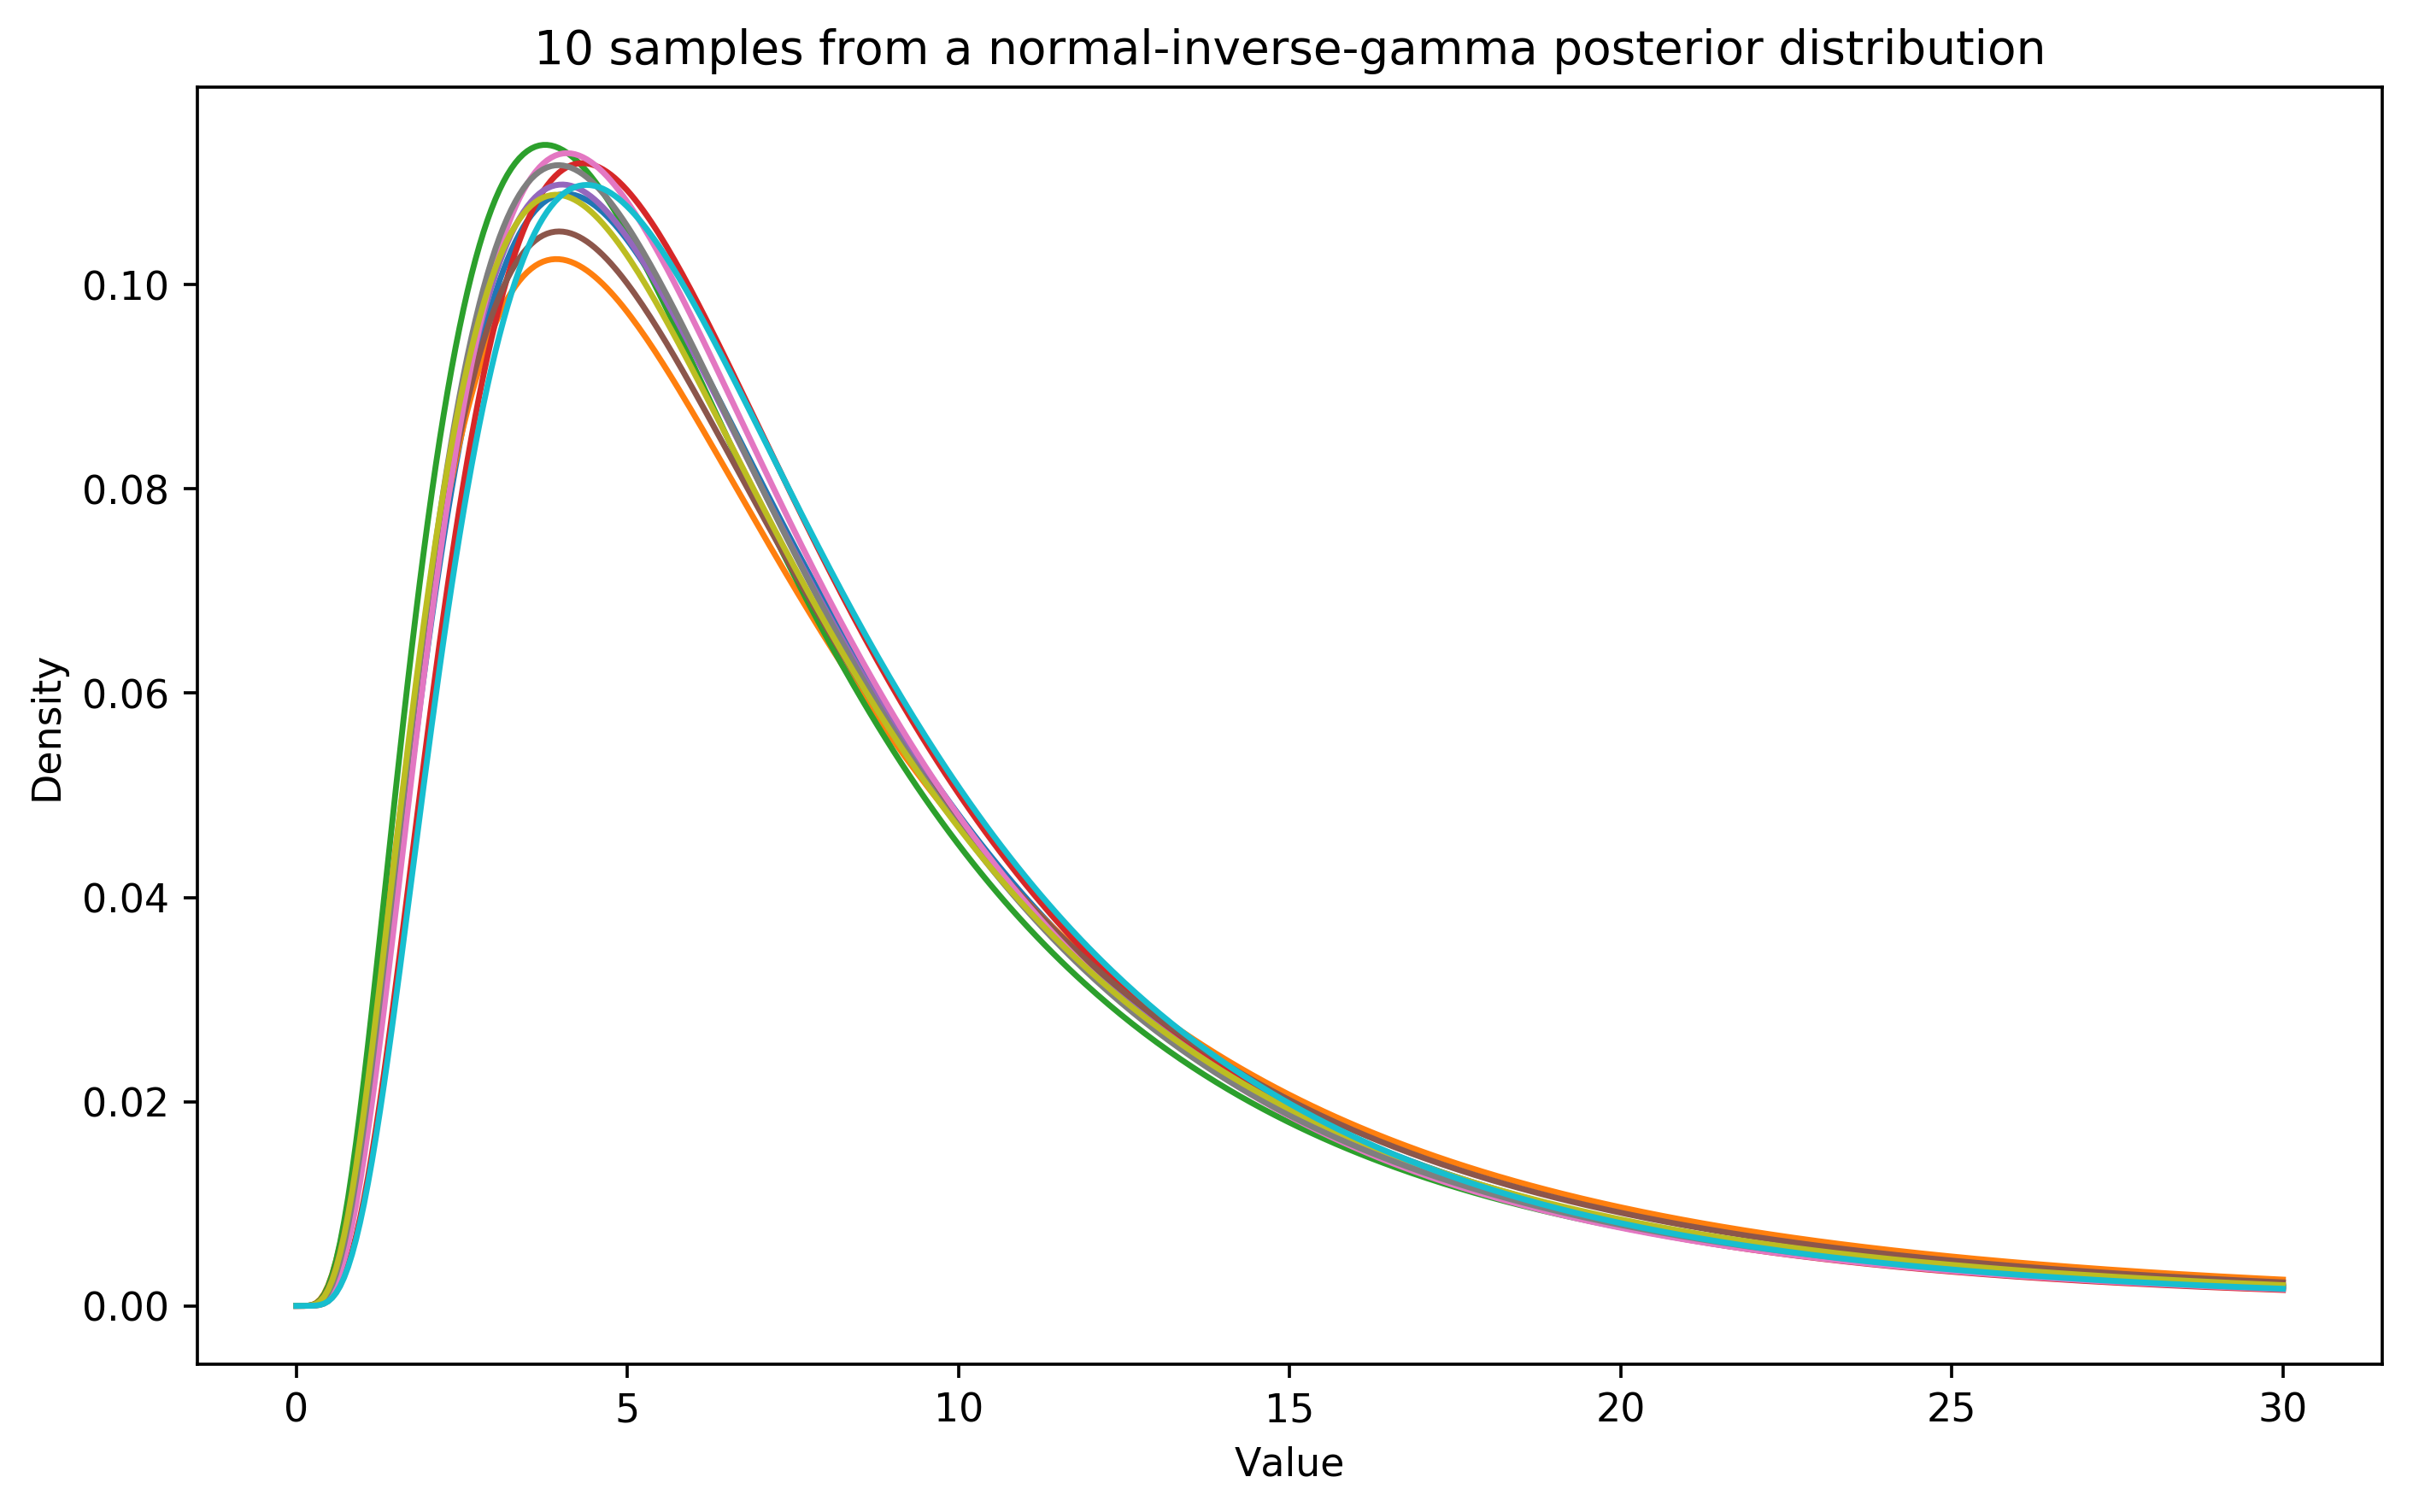

In [226]:
plt.figure(figsize=(10, 6), dpi=330)
plot_x = np.linspace(0, 30, 500)

for i in range(num_samples):
    plot_y = sts.lognorm.pdf(plot_x, np.sqrt(sigma2_samples_hrtem[i]), scale=np.exp(x_samples_hrtem[i]))
    plt.plot(plot_x, plot_y)
    
plt.ylabel('Density')
plt.xlabel('Value')
plt.title('%i samples from a normal-inverse-gamma posterior distribution' % num_samples)
plt.show()